In [1]:
import numpy as np
import pandas as pd
import pickle
from hmmlearn import hmm
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
rng = np.random.default_rng(0)
data_frame = pd.read_csv('./Original_Dataset.csv')
print(data_frame.head())


   LC_X_1  LC_X_2  LC_X_3  LC_X_4  LC_X_5  LC_X_6  LC_X_7  LC_X_8  LC_X_9  \
0     307     389     259     259     259     259     259     258     258   
1     340     340     340     340     339     339     340     339     338   
2     260     263     266     266     270     271     271     271     271   
3     338     339     338     337     337     337     337     337     336   
4     319     240     240     318     241     318     318     318     318   

   LC_X_10  ...  RD_22  RD_23  RD_24  RD_25  RD_26  RD_27  RD_28  RD_29  \
0      259  ...   1001   1001   1004   1007   1013   1013   1016   1016   
1      338  ...   1007   1007   1007   1010   1010   1010   1010   1013   
2      271  ...    962    959      0    957    957    959    959    962   
3      335  ...   1013   1010   1010   1010   1013   1010   1010   1013   
4      318  ...   1016   1016   1022   1022   1013   1016   1016   1019   

   RD_30  Gesture  
0   1019   ZoomIn  
1   1010   ZoomIn  
2    962   ZoomIn  
3   10

In [3]:
for p in data_frame.columns:
    print(p)


LC_X_1
LC_X_2
LC_X_3
LC_X_4
LC_X_5
LC_X_6
LC_X_7
LC_X_8
LC_X_9
LC_X_10
LC_X_11
LC_X_12
LC_X_13
LC_X_14
LC_X_15
LC_X_16
LC_X_17
LC_X_18
LC_X_19
LC_X_20
LC_X_21
LC_X_22
LC_X_23
LC_X_24
LC_X_25
LC_X_26
LC_X_27
LC_X_28
LC_X_29
LC_X_30
LC_Y_1
LC_Y_2
LC_Y_3
LC_Y_4
LC_Y_5
LC_Y_6
LC_Y_7
LC_Y_8
LC_Y_9
LC_Y_10
LC_Y_11
LC_Y_12
LC_Y_13
LC_Y_14
LC_Y_15
LC_Y_16
LC_Y_17
LC_Y_18
LC_Y_19
LC_Y_20
LC_Y_21
LC_Y_22
LC_Y_23
LC_Y_24
LC_Y_25
LC_Y_26
LC_Y_27
LC_Y_28
LC_Y_29
LC_Y_30
LF_X_1_1
LF_X_1_2
LF_X_1_3
LF_X_1_4
LF_X_1_5
LF_X_1_6
LF_X_1_7
LF_X_1_8
LF_X_1_9
LF_X_1_10
LF_X_1_11
LF_X_1_12
LF_X_1_13
LF_X_1_14
LF_X_1_15
LF_X_1_16
LF_X_1_17
LF_X_1_18
LF_X_1_19
LF_X_1_20
LF_X_1_21
LF_X_1_22
LF_X_1_23
LF_X_1_24
LF_X_1_25
LF_X_1_26
LF_X_1_27
LF_X_1_28
LF_X_1_29
LF_X_1_30
LF_X_2_1
LF_X_2_2
LF_X_2_3
LF_X_2_4
LF_X_2_5
LF_X_2_6
LF_X_2_7
LF_X_2_8
LF_X_2_9
LF_X_2_10
LF_X_2_11
LF_X_2_12
LF_X_2_13
LF_X_2_14
LF_X_2_15
LF_X_2_16
LF_X_2_17
LF_X_2_18
LF_X_2_19
LF_X_2_20
LF_X_2_21
LF_X_2_22
LF_X_2_23
LF_X_2_24
LF_X_2_25
LF_X_2

In [55]:
LeftCenterx_columns = ['LC_X_' + str(i) for i in range(1, 31)]
LeftCentery_columns = ['LC_Y_' + str(i) for i in range(1, 31)]
RightCenterx_columns = ['RC_X_' + str(i) for i in range(1, 31)]
RightCentery_columns = ['RC_Y_' + str(i) for i in range(1, 31)]
gesture_column = ['Gesture']

columns_to_keep =  LeftCenterx_columns + LeftCentery_columns + RightCenterx_columns + RightCentery_columns + gesture_column
columns = [LeftCenterx_columns, LeftCentery_columns, RightCenterx_columns, RightCentery_columns]

data_frame1 = data_frame[columns_to_keep]
data = data_frame1[LeftCenterx_columns + LeftCentery_columns + RightCenterx_columns + RightCentery_columns]
labels = data_frame1[gesture_column]
gestures = labels.iloc[:, 0].unique()

print('______________________GESTURES___________________________________________________\n')

print(gestures)

print('_______________________DATAFRAME_________________________________________________\n')

print(data_frame1)

print('_______________________DATA_____________________________________________________\n')

print(data)

print('______________________LABELS____________________________________________________\n')

print(labels)

print('______________________COLUMNS___________________________________________________\n')

print(columns)

______________________GESTURES_____________________________________________________
['ZoomIn' 'ZoomOut' 'MoveLeft' 'MoveRight' 'MoveDown' 'MoveUp' 'Press']
_______________________DATAFRAME_________________________________________________
     LC_X_1  LC_X_2  LC_X_3  LC_X_4  LC_X_5  LC_X_6  LC_X_7  LC_X_8  LC_X_9  \
0       307     389     259     259     259     259     259     258     258   
1       340     340     340     340     339     339     340     339     338   
2       260     263     266     266     270     271     271     271     271   
3       338     339     338     337     337     337     337     337     336   
4       319     240     240     318     241     318     318     318     318   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
345       0     309     309     309     309     309     309     309     309   
346     301     300     302     302     302     301     299     300     301   
347     298     295     294     292     292     290

In [67]:
trn_ds = {}
tst_ds = {}

indcs = np.arange(50)
rng.shuffle(indcs)
trn_indcs = indcs[:40]
tst_indcs = indcs[40:]

for g in gestures:
    dataleftx = data.loc[data_frame1['Gesture']==g, LeftCenterx_columns].to_numpy()
    datalefty = data.loc[data_frame1['Gesture']==g, LeftCentery_columns].to_numpy()
    datarightx = data.loc[data_frame1['Gesture']==g, RightCenterx_columns].to_numpy()
    datarighty = data.loc[data_frame1['Gesture']==g, RightCentery_columns].to_numpy()
    
    dataleftx[:, 1] = (dataleftx[:, 1] - min(dataleftx[:, 1]))/(max(dataleftx[:, 1]) - min(dataleftx[:, 1]))
    datalefty[:, 1] = (datalefty[:, 1] - min(datalefty[:, 1]))/(max(datalefty[:, 1]) - min(datalefty[:, 1]))
    datarightx[:, 1] = (datarightx[:, 1] - min(datarightx[:, 1]))/(max(datarightx[:, 1]) - min(datarightx[:, 1]))
    datarighty[:, 1] = (datarighty[:, 1] - min(datarighty[:, 1]))/(max(datarighty[:, 1]) - min(datarighty[:, 1]))
    
    trn_ds[g] = np.array([dataleftx[trn_indcs, :], datalefty[trn_indcs, :], datarightx[trn_indcs, :],
                                  datarighty[trn_indcs, :]]).transpose(1, 2, 0)
    
    tst_ds[g] = np.array([dataleftx[tst_indcs, :], datalefty[tst_indcs, :], datarightx[tst_indcs, :],
                                  datarighty[tst_indcs, :]]).transpose(1, 2, 0)
    
    print('Training Data of',g,trn_ds[g].shape)
    print('Testing Data of',g,tst_ds[g].shape)
    

Training Data of ZoomIn (40, 30, 4)
Testing Data of ZoomIn (10, 30, 4)
Training Data of ZoomOut (40, 30, 4)
Testing Data of ZoomOut (10, 30, 4)
Training Data of MoveLeft (40, 30, 4)
Testing Data of MoveLeft (10, 30, 4)
Training Data of MoveRight (40, 30, 4)
Testing Data of MoveRight (10, 30, 4)
Training Data of MoveDown (40, 30, 4)
Testing Data of MoveDown (10, 30, 4)
Training Data of MoveUp (40, 30, 4)
Testing Data of MoveUp (10, 30, 4)
Training Data of Press (40, 30, 4)
Testing Data of Press (10, 30, 4)


In [6]:
def trn_hmms(trn_ds, n_comps=4, verbose=False):
    trned_hmms = {}
    for g in gestures:
        trned_hmms[g] = hmm.GaussianHMM(n_components=n_comps, covariance_type="diag", 
                                          n_iter=100, init_params="cm")
        trned_hmms[g].fit(trn_ds[g].reshape(-1, 120))
        if verbose:
            print(trned_hmms[g].monitor_.converged)
    return trned_hmms


In [7]:
trned_hmms = trn_hmms(trn_ds, verbose=True)


True
True
True
True
True
True
True


In [53]:
def tst_hmms(tst_ds, trned_hmms):
    true_labls = []
    pred_labls = []
    for g in gestures:
        tst_data = tst_ds[g].reshape(-1, 120)
        true_labls += [g]*tst_data.shape[0]
        for t in tst_data:
            pred_labl = 0
            max_scr = -1e10
            for g in gestures:
                mdl = trned_hmms[g]
                scr = mdl.score(t.reshape(1, -1))
                if scr >= max_scr:
                    pred_labl = g
                    max_scr = scr
            pred_labls.append(g)
    ttl_scr = 0.0
    for t, p in zip(true_labls, pred_labls):
        if t == p:
            ttl_scr += 1
    accrcy = ttl_scr/len(true_labls)
    return accrcy


In [69]:
print('Accuracy of the model is shown below:')
tst_hmms(tst_ds, trned_hmms)


Accuracy of the model is shown below:


0.14285714285714285

In [70]:
n_comps_lst = [1, 5, 10]
ac_lst = []
for n in n_comps_lst:
    trned_hmms = trn_hmms(trn_ds, n_comps=n)
    accrcy = tst_hmms(tst_ds, trned_hmms)
    ac_lst.append(accrcy)
    print("For {} components, accuracy = {:.4f}".format(n, accrcy))

ac_dictionary = {'n components': n_comps_lst, 'accuracies': ac_lst}
ac_dataframe = pd.DataFrame.from_dict(ac_dictionary)
print(ac_dataframe.to_markdown())


For 1 components, accuracy = 0.1429
For 5 components, accuracy = 0.1429
For 10 components, accuracy = 0.1429
|    |   n components |   accuracies |
|---:|---------------:|-------------:|
|  0 |              1 |     0.142857 |
|  1 |              5 |     0.142857 |
|  2 |             10 |     0.142857 |


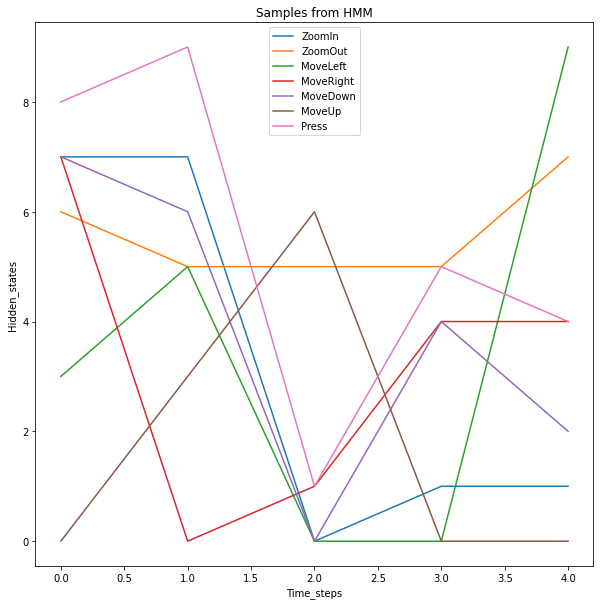

In [58]:
trned_hmms = trn_hmms(trn_ds, n_comps=10)
samps_gen = []
for g in gestures:
    mdl = trned_hmms[g]
    samps_gen.append(mdl.sample(n_samples=5)[1])
plt.figure(figsize=(10, 10))
for s, g in zip(samps_gen, gestures):
    plt.plot(s, label=g)
plt.legend()
plt.xlabel('Time_steps')
plt.ylabel('Hidden_states')
plt.title('Samples from HMM')
plt.show()


In [75]:
def fwd(V, mdl):
    a = mdl.transmat_
    intl_disn = mdl.startprob_
    avg = mdl.avgs_
    co_vars = model.covars_
    al = np.zeros((V.shape[0], a.shape[0]))
    al[0, :] = intl_dis * b[:, V[0]]
 
    for t in range(1, V.shape[1]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            avg_vec = avgs[j, :]
            co_var = co_vars[j, :, :]
            probab = np.dot(np.dot(avg_vec - V[t], np.linalg.inv(co_var)), avg_vec - V[t])
            probab = np.exp(-probab)/((2*pi)**60*np.linalg.det(co_var))
            al[t, j] = al[t - 1].dot(a[:, j]) * probab
    return al[-1, :].avg()

In [76]:
def fwd_hmms(tst_ds, trned_hmms):
    true_labls = []
    pred_labls = []
    for g in gestures:
        tst_data = tst_ds[g].reshape(-1, 120)
        true_labls += [g]*tst_data.shape[0]
        for t in tst_data:
            pred_labl = 0
            max_scr = -1e10
            for g in gestures:
                mdl = trned_hmms[g]
                scr = fwd(t.reshape(1, -1), mdl)
                if scr > max_scr:
                    pred_lbl = g
            pred_lbls.append(g)

    ttl_scr = 0.0
    for t, p in zip(true_labls, pred_labls):
        if t == p:
            ttl_scr += 1
    accrcy = ttl_scr/len(true_lbls)
    return accrcy
 

In [77]:
print('Accuracy of the model after Forward Algorithm:')
tst_hmms(tst_ds, trned_hmms)


Accuracy of the model after Forward Algorithm:


0.14285714285714285